In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing


In [3]:


data=pd.read_excel(r'C:\Users\HP\Downloads\19CSE305_LabData_Set3.1.xlsx',  sheet_name='thyroid0387_UCI', usecols="A:AE", engine='openpyxl')
data


,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,841031002,41,F,f,f,f,f,f,f,f,...,t,148,t,1.44,t,103,f,?,STMW,NO CONDITION
996,841031010,41,F,f,f,f,f,f,f,f,...,t,9.7,t,1.46,t,6.6,f,?,other,F
997,841031030,20,F,f,f,f,f,t,f,f,...,f,?,f,?,f,?,t,30,other,NO CONDITION
998,841031031,20,F,f,f,f,f,f,f,f,...,t,201,t,0.84,t,240,f,?,SVI,AK


In [19]:
data_types = data.dtypes
nominal_attributes = data_types[data_types == 'object'].index.tolist()
ordinal_attributes = []

for column in data.columns:
    if data[column].dtype == 'object' or data[column].dtype.name == 'category':
        unique_values = set(data[column])
        

        sorted_values=[]
        if all(isinstance(value, (str, int, float)) for value in unique_values):
            
            if unique_values == sorted_values or unique_values == sorted_values[::-1]:
                ordinal_attributes.append(column)

print("Nominal Attributes:", nominal_attributes)
print("\n")
print("Ordinal Attributes:", ordinal_attributes)

numerical_attributes = data_types[(data_types == 'int64') | (data_types == 'float64')].index.tolist()
print("Numerical Attributes:", numerical_attributes)


one_hot_encoded_data = pd.get_dummies(data, columns=['sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source', 'Condition'])
print(one_hot_encoded_data)



Nominal Attributes: ['sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source', 'Condition']


Ordinal Attributes: []
Numerical Attributes: ['Record ID', 'age']
     Record ID       age  sex_?  sex_F  sex_M  on thyroxine_f  on thyroxine_t  \
0     0.000000  0.279070      0      1      0               1               0   
1     0.001001  0.279070      0      1      0               1               0   
2     0.002002  0.418605      0      1      0               1               0   
3     0.003003  0.360465      0      1      0               1               0   
4     0.004004  0.313953      0      1      0               1               0   
..         ...       ...   

In [8]:
from sklearn.preprocessing import LabelEncoder
encode = ['Record ID','age']

label_encoders = {}

for column in encode:
    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])
    
data


,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,0,24,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,NO CONDITION
1,1,24,F,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,NO CONDITION
2,2,36,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,NO CONDITION
3,3,31,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,NO CONDITION
4,4,27,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,36,F,f,f,f,f,f,f,f,...,t,148,t,1.44,t,103,f,?,STMW,NO CONDITION
996,996,36,F,f,f,f,f,f,f,f,...,t,9.7,t,1.46,t,6.6,f,?,other,F
997,997,15,F,f,f,f,f,t,f,f,...,f,?,f,?,f,?,t,30,other,NO CONDITION
998,998,15,F,f,f,f,f,f,f,f,...,t,201,t,0.84,t,240,f,?,SVI,AK


In [9]:

numeric_columns = data.select_dtypes(include=['int64', 'float64'])


for column in numeric_columns.columns:
    min_value = numeric_columns[column].min()
    max_value = numeric_columns[column].max()
    print(f"{column}: Min = {min_value}, Max = {max_value}")


Record ID: Min = 0, Max = 999
age: Min = 0, Max = 86


In [10]:

# # missing_values = data.isna()

# # missing_count = missing_values.sum()


# # print("Missing Values Count for Each Column:")
# # for column, count in missing_count.items():
# #     print(f"{column}: {count} missing values")


specific_value_counts = {}


values_to_count = ['?']

for column in data.columns:
    specific_value_counts[column] = data[column].isin(values_to_count).sum()


for column, count in specific_value_counts.items():
    
    print(f"Missing Values Count for {column}: {count}")


Missing Values Count for Record ID: 0
Missing Values Count for age: 0
Missing Values Count for sex: 24
Missing Values Count for on thyroxine: 0
Missing Values Count for query on thyroxine: 0
Missing Values Count for on antithyroid medication: 0
Missing Values Count for sick: 0
Missing Values Count for pregnant: 0
Missing Values Count for thyroid surgery: 0
Missing Values Count for I131 treatment: 0
Missing Values Count for query hypothyroid: 0
Missing Values Count for query hyperthyroid: 0
Missing Values Count for lithium: 0
Missing Values Count for goitre: 0
Missing Values Count for tumor: 0
Missing Values Count for hypopituitary: 0
Missing Values Count for psych: 0
Missing Values Count for TSH measured: 0
Missing Values Count for TSH: 115
Missing Values Count for T3 measured: 0
Missing Values Count for T3: 202
Missing Values Count for TT4 measured: 0
Missing Values Count for TT4: 40
Missing Values Count for T4U measured: 0
Missing Values Count for T4U: 98
Missing Values Count for FTI

Outliers in Record ID:
Series([], Name: Record ID, dtype: int64)


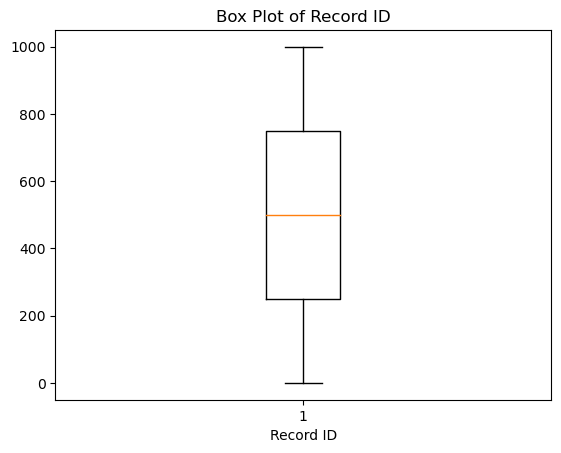

Outliers in age:
Series([], Name: age, dtype: int64)


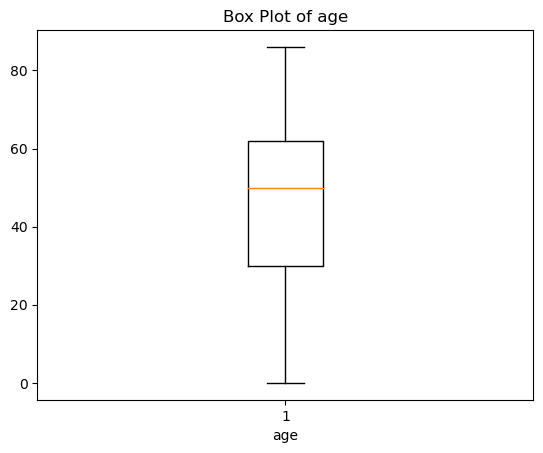

In [11]:

import matplotlib.pyplot as plt
from scipy import stats
numeric_columns = ['Record ID', 'age']  
for numeric_variable in numeric_columns:
    z_scores = stats.zscore(data[numeric_variable])
    abs_z_scores = abs(z_scores)

    
    threshold = 3

   
    outliers = (abs_z_scores > threshold)
    outlier_values = data[numeric_variable][outliers]
    print(f"Outliers in {numeric_variable}:")
    print(outlier_values)

   
    plt.boxplot(data[numeric_variable])
    plt.xlabel(numeric_variable)
    plt.title(f'Box Plot of {numeric_variable}')
    plt.show()


In [12]:

numeric_variables = ['Record ID', 'age'] 

for variable in numeric_variables:
    
    mean = data[variable].mean()
    
    
    variance = data[variable].var()
    
    
    std_deviation = data[variable].std()
    
   
    print(f"{variable}:")
    print(f"  Mean: {mean}")
    print(f"  Variance: {variance}")
    print(f"  Standard Deviation: {std_deviation}\n")


Record ID:
  Mean: 499.5
  Variance: 83416.66666666667
  Standard Deviation: 288.8194360957494

age:
  Mean: 46.503
  Variance: 350.50649749749806
  Standard Deviation: 18.721818755064852



In [13]:

missing_values = data.isna()
numeric_with_outliers = ['Record ID', 'age'] 
numeric_no_outliers = ['Record ID', 'age'] 
categorical_columns = data.select_dtypes(include=['object', 'category'])
categorical_column_names = categorical_columns.columns.tolist()
print("Categorical Columns:")
print(categorical_column_names)
categorical_attributes = ['sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source', 'Condition']  
for attribute in numeric_no_outliers:
    mean = data[attribute].mean()
    data[attribute].fillna(mean, inplace=True)

for attribute in numeric_with_outliers:
    median = data[attribute].median()
    data[attribute].fillna(median, inplace=True)

for attribute in categorical_attributes:
    mode = data[attribute].mode().iloc[0]
    data[attribute].fillna(mode, inplace=True)


remaining_missing = data.isna().sum()
print("Remaining Missing Values:")
print(remaining_missing)



Categorical Columns:
['sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source', 'Condition']
Remaining Missing Values:
Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured               

In [14]:

from sklearn.preprocessing import MinMaxScaler


numeric_columns = data.select_dtypes(include=['int64', 'float64'])


scaler = MinMaxScaler()

data[numeric_columns.columns] = scaler.fit_transform(data[numeric_columns.columns])


print("Normalized Dataset:")
print(data.head())




Normalized Dataset:
   Record ID       age sex on thyroxine query on thyroxine  \
0   0.000000  0.279070   F            f                  f   
1   0.001001  0.279070   F            f                  f   
2   0.002002  0.418605   F            f                  f   
3   0.003003  0.360465   F            f                  f   
4   0.004004  0.313953   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
0            f    ?            f   ?          

In [15]:


binary_attributes = []


for column in data.columns:
    unique_values = data[column].unique()
    if len(unique_values) == 2 and set(unique_values) == {0, 1}:
        binary_attributes.append(column)


print("Binary Attributes:")
print(binary_attributes)




vector1 = data.iloc[0][binary_attributes].tolist()
vector2 = data.iloc[1][binary_attributes].tolist()


f11 = sum(x & y for x, y in zip(vector1, vector2))
f01 = sum(1 for x, y in zip(vector1, vector2) if x == 0 and y == 1)
f10 = sum(1 for x, y in zip(vector1, vector2) if x == 1 and y == 0)


if f01 + f10 + f11 == 0:
    jc = 0.0
else:
    jc = f11 / (f01 + f10 + f11)


smc_denominator = len(binary_attributes)
if smc_denominator == 0:
    smc = 0.0
else:
    smc = (f11 + sum(1 for x, y in zip(vector1, vector2) if x == y)) / smc_denominator


print("Jaccard Coefficient (JC):", jc)
print("Simple Matching Coefficient (SMC):", smc)

Binary Attributes:
[]
Jaccard Coefficient (JC): 0.0
Simple Matching Coefficient (SMC): 0.0


In [16]:

from sklearn.metrics.pairwise import cosine_similarity

feature_columns = data.columns[:-1]


df_encoded = pd.get_dummies(data, columns=feature_columns, drop_first=True)

vector1 = df_encoded.iloc[0, 1:].values  
vector2 = df_encoded.iloc[1, 1:].values  
vector1 = vector1.reshape(1, -1)
vector2 = vector2.reshape(1, -1)


cosine_sim = cosine_similarity(vector1, vector2)


print("Cosine Similarity:", cosine_sim[0, 0])


Cosine Similarity: 0.5853694070049635


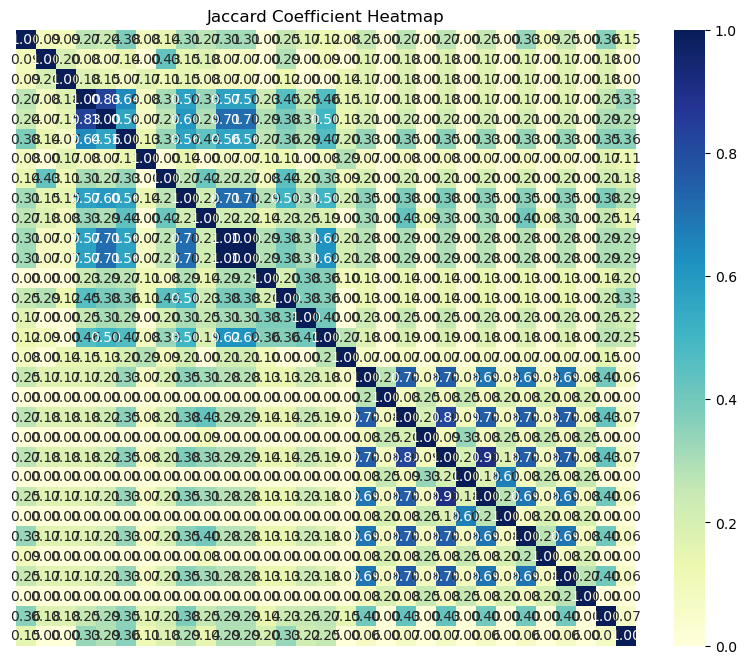

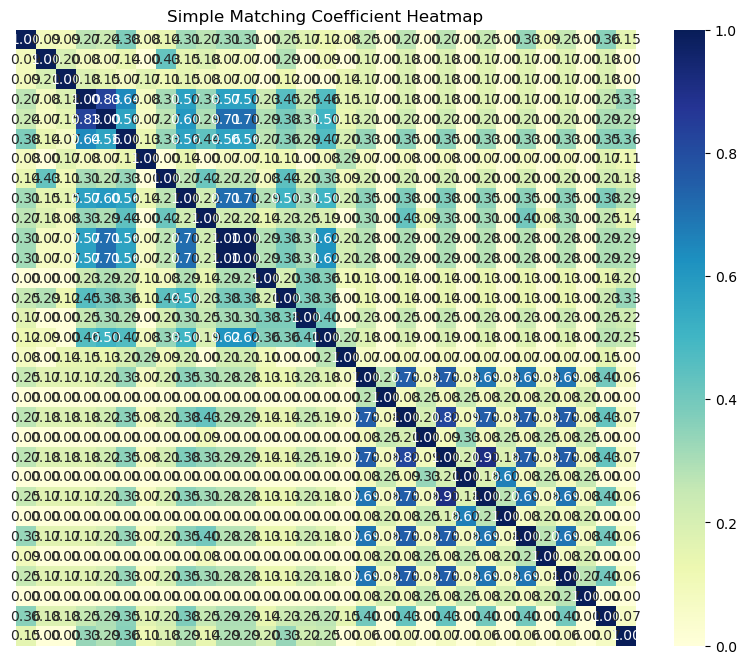

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

vectors = data.iloc[:20]
def jaccard_coefficient(vector1, vector2):
    intersection = len(set(vector1) & set(vector2))
    union = len(set(vector1) | set(vector2))
    return intersection / union
def simple_matching_coefficient(vector1, vector2):
    intersection = len(set(vector1) & set(vector2))
    union = len(set(vector1) | set(vector2))
    return intersection / union
jc_matrix = [[jaccard_coefficient(vector1, vector2) for vector2 in vectors] for vector1 in vectors]
smc_matrix = [[simple_matching_coefficient(vector1, vector2) for vector2 in vectors] for vector1 in vectors]
plt.figure(figsize=(10, 8))
sns.heatmap(jc_matrix, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title("Jaccard Coefficient Heatmap")
plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(smc_matrix, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title("Simple Matching Coefficient Heatmap")
plt.show()